In [1]:
# pip install numpy
# pip install matplotlib
# !pip install seaborn

# !pip install pandas

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import math

# Cereal analysis

In [3]:
df=pd.read_csv('cereal.csv')

## Content
### Fields in the dataset:

Name: Name of cereal <br> 
mfr: Manufacturer of cereal <br> 
A = American Home Food Products <br> 
G = General Mills <br> 
K = Kelloggs <br> 
N = Nabisco <br> 
P = Post <br>
Q = Quaker Oats <br> 
R = Ralston Purina <br> 
type: cold & hot <br> 
calories: calories per serving <br> 
protein: grams of protein <br> 
fat: grams of fat <br> 
sodium: milligrams of sodium <br> 
fiber: grams of dietary fiber <br> 
carbo: grams of complex carbohydrates <br> 
sugars: grams of sugars <br> 
potass: milligrams of potassium <br> 
vitamins: vitamins and minerals - 0, 25, or 100, indicating the typical percentage of FDA recommended <br> 
shelf: display shelf (1, 2, or 3, counting from the floor) <br> 
weight: weight in ounces of one serving <br> 
cups: number of cups in one serving <br> 
rating: a rating of the cereals (Possibly from Consumer Reports?) <br> 
Acknowledgements: <br> 
These datasets have been gathered and cleaned up by Petra Isenberg, Pierre Dragicevic and Yvonne Jansen. <br> 
The original source can be found here <br> 

This dataset has been converted to CSV <br> 

Inspiration <br> 

In [4]:
df.rename(columns={"mfr":"Manufacturer","potass":"Potassium","carbo":"Carbohydrates"},inplace=True)
df = df.sort_values("rating",ascending=False)
print("data frame orderd by rating:")
df.head(10)

data frame orderd by rating:


,name,Manufacturer,type,calories,protein,fat,sodium,fiber,Carbohydrates,sugars,Potassium,vitamins,shelf,weight,cups,rating
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.00,0.50,93.704912
64,Shredded Wheat 'n'Bran,N,C,90,3,0,0,4.0,19.0,0,140,0,1,1.00,0.67,74.472949
65,Shredded Wheat spoon size,N,C,90,3,0,0,3.0,20.0,0,120,0,1,1.00,0.67,72.801787
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.00,0.33,68.402973
63,Shredded Wheat,N,C,80,2,0,0,3.0,16.0,0,95,0,1,0.83,1.00,68.235885
20,Cream of Wheat (Quick),N,H,100,3,0,80,1.0,21.0,0,-1,0,2,1.00,1.00,64.533816
55,Puffed Wheat,Q,C,50,2,0,0,1.0,10.0,0,50,0,3,0.50,1.00,63.005645
54,Puffed Rice,Q,C,50,1,0,0,0.0,13.0,0,15,0,3,0.50,1.00,60.756112
50,Nutri-grain Wheat,K,C,90,3,0,170,3.0,18.0,2,90,25,3,1.00,1.00,59.642837
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.00,0.33,59.425505


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77 entries, 3 to 10
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           77 non-null     object 
 1   Manufacturer   77 non-null     object 
 2   type           77 non-null     object 
 3   calories       77 non-null     int64  
 4   protein        77 non-null     int64  
 5   fat            77 non-null     int64  
 6   sodium         77 non-null     int64  
 7   fiber          77 non-null     float64
 8   Carbohydrates  77 non-null     float64
 9   sugars         77 non-null     int64  
 10  Potassium      77 non-null     int64  
 11  vitamins       77 non-null     int64  
 12  shelf          77 non-null     int64  
 13  weight         77 non-null     float64
 14  cups           77 non-null     float64
 15  rating         77 non-null     float64
dtypes: float64(5), int64(8), object(3)
memory usage: 10.2+ KB


In [6]:
print("data frame shape : ")
df.shape

data frame shape : 


(77, 16)

In [7]:
print("basic statistical information:")
df.describe()

basic statistical information:


,calories,protein,fat,sodium,fiber,Carbohydrates,sugars,Potassium,vitamins,shelf,weight,cups,rating
count,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000
mean,106.883117,2.545455,1.012987,159.675325,2.151948,14.597403,6.922078,96.077922,28.246753,2.207792,1.029610,0.821039,42.665705
std,19.484119,1.094790,1.006473,83.832295,2.383364,4.278956,4.444885,71.286813,22.342523,0.832524,0.150477,0.232716,14.047289
min,50.000000,1.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,1.000000,0.500000,0.250000,18.042851
25%,100.000000,2.000000,0.000000,130.000000,1.000000,12.000000,3.000000,40.000000,25.000000,1.000000,1.000000,0.670000,33.174094
50%,110.000000,3.000000,1.000000,180.000000,2.000000,14.000000,7.000000,90.000000,25.000000,2.000000,1.000000,0.750000,40.400208
75%,110.000000,3.000000,2.000000,210.000000,3.000000,17.000000,11.000000,120.000000,25.000000,3.000000,1.000000,1.000000,50.828392
max,160.000000,6.000000,5.000000,320.000000,14.000000,23.000000,15.000000,330.000000,100.000000,3.000000,1.500000,1.500000,93.704912


Text(0.5, 0, 'rating')

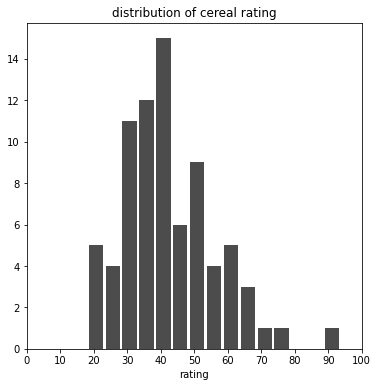

In [8]:
plt.figure(figsize=(6,6))
plt.hist(df["rating"],bins=15,color="black",alpha=0.7, rwidth=0.85)
plt.title("distribution of cereal rating")
plt.xticks([0,10,20,30,40,50,60,70,80,90,100])
plt.xlabel("rating")

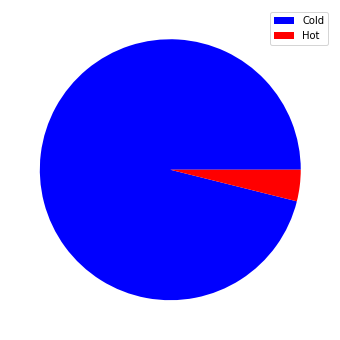

In [9]:
plt.figure(figsize=(6,6))
count_cold= len(df[df['type']=='C'])
count_hot= len(df[df['type']=='H'])
list_count_type = [count_cold,count_hot]
type_labels = ["Cold", "Hot"]
patches, texts = plt.pie(list_count_type, colors=['blue','red'])
plt.legend(patches, type_labels, loc="best")


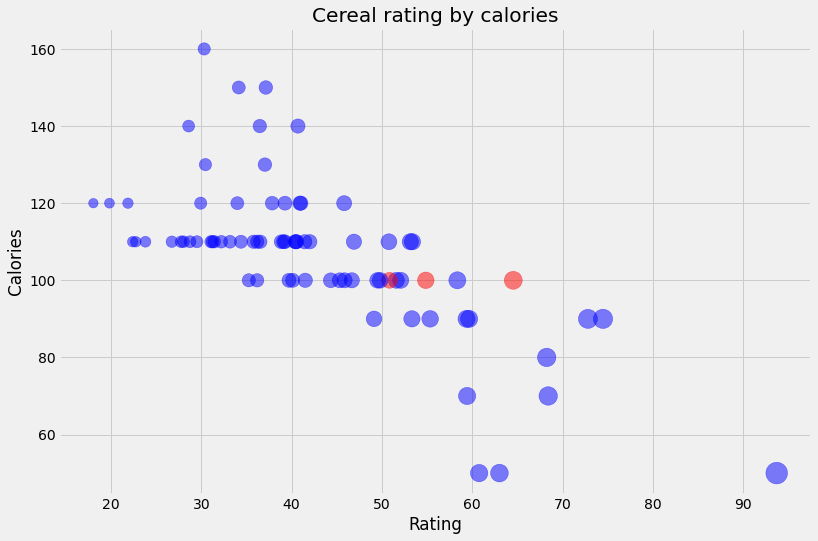

In [10]:
#set the creales prasentation(color) by there temperature
area = df['rating']*5
colors=[]
for i,r in df.iterrows() :
    if  r['type']=='C':
        colors.append('blue')
    else:
        colors.append('red')
        
# Set the figure style and initalize a new figure
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(12,8))

# Create a scatter plot of rating versus calories
plt.scatter(df['rating'],df['calories'], s=area, c=colors, alpha=0.5)


# Create a title and axis labels
plt.title("Cereal rating by calories")
plt.xlabel('Rating') 
plt.ylabel('Calories') 

# Show the plot
plt.show()

### Conclusions:
It can be seen that the smaller the number of calories, the higher the rating of the product.

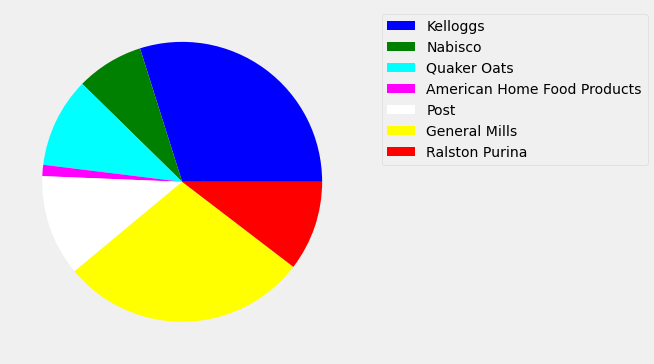

In [11]:
plt.figure(figsize=(6,6))
count_A= len(df[df['Manufacturer']=='A'])
count_G= len(df[df['Manufacturer']=='G'])
count_K= len(df[df['Manufacturer']=='K'])
count_N= len(df[df['Manufacturer']=='N'])
count_P= len(df[df['Manufacturer']=='P'])
count_Q= len(df[df['Manufacturer']=='Q'])
count_R= len(df[df['Manufacturer']=='R'])
list_count_type = [count_K,count_N,count_Q,count_A,count_P,count_G,count_R]
type_labels = ["Kelloggs","Nabisco","Quaker Oats","American Home Food Products","Post","General Mills" ,"Ralston Purina"]
patches, texts = plt.pie(list_count_type, colors=['blue','green','cyan','magenta','white','yellow','red'])
plt.legend(patches, type_labels, bbox_to_anchor=(1.05, 1), loc='upper left')

<AxesSubplot:xlabel='count', ylabel='Manufacturer'>

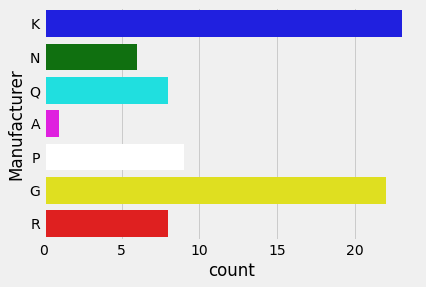

In [12]:
sns.countplot(y=df['Manufacturer'], palette=['blue','green','cyan','magenta','white','yellow','red'])

In [13]:
rating_groun_by_Manufacturer = df.groupby("Manufacturer")["rating"].mean()
rating_groun_by_Manufacturer.head()

Manufacturer
A    54.850917
G    34.485852
K    44.038462
N    67.968567
P    41.705744
Name: rating, dtype: float64

### mfr: Manufacturer of cereal <br>
A = American Home Food Products <br> 
G = General Mills <br> 
K = Kelloggs <br> 
N = Nabisco <br> 
P = Post <br>
Q = Quaker Oats <br> 
R = Ralston Purina <br> 

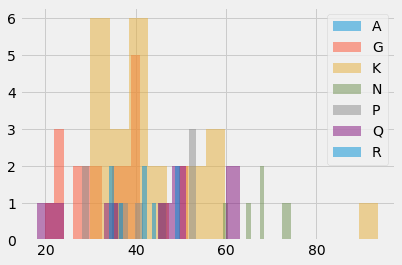

In [14]:
df[df["Manufacturer"]=="A"]["rating"].hist(alpha=0.5,bins=15)
df[df["Manufacturer"]=="G"]["rating"].hist(alpha=0.5,bins=15)
df[df["Manufacturer"]=="K"]["rating"].hist(alpha=0.5,bins=15)
df[df["Manufacturer"]=="N"]["rating"].hist(alpha=0.5,bins=15)
df[df["Manufacturer"]=="P"]["rating"].hist(alpha=0.5,bins=15)
df[df["Manufacturer"]=="Q"]["rating"].hist(alpha=0.5,bins=15)
df[df["Manufacturer"]=="R"]["rating"].hist(alpha=0.5,bins=15)
plt.legend(["A","G","K","N","P","Q","R"])


In [15]:
raiting_calories_by_manufa = df.groupby("Manufacturer")["rating","calories"].mean()
raiting_calories_by_manufa

C:\Users\CORALR~1\AppData\Local\Temp/ipykernel_12012/829523572.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  raiting_calories_by_manufa = df.groupby("Manufacturer")["rating","calories"].mean()


,rating,calories
Manufacturer,,
A,54.850917,100.000000
G,34.485852,111.363636
K,44.038462,108.695652
N,67.968567,86.666667
P,41.705744,108.888889
Q,42.915990,95.000000
R,41.542997,115.000000


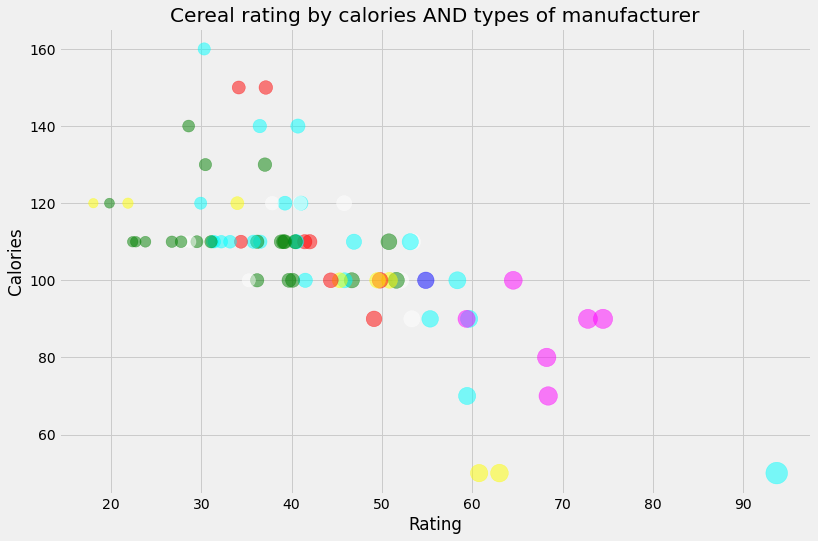

In [16]:
colors_new=[]
for i,r in df.iterrows() :
    if  r['Manufacturer']=='A':
        colors_new.append('blue')
    elif  r['Manufacturer']=='G':
        colors_new.append('green')
    elif  r['Manufacturer']=='K':
        colors_new.append('cyan')
    elif  r['Manufacturer']=='N':
        colors_new.append('magenta')
    elif  r['Manufacturer']=='P':
        colors_new.append('white')
    elif  r['Manufacturer']=='Q':
        colors_new.append('yellow')
    else:
        colors_new.append('red')
        
# Set the figure style and initalize a new figure
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(12,8))

# Create a scatter plot of rating versus calories
scatter = plt.scatter(df['rating'],df['calories'], s=area, c=colors_new, alpha=0.5)
# Create a title and axis labels
plt.title("Cereal rating by calories AND types of manufacturer")
plt.xlabel('Rating') 
plt.ylabel('Calories') 

# Show the plot
plt.show()

## Separate the data to two groups-  from rating 50 and above and from rating of 50 and below.

In [17]:
cereal_50plus =df[df['rating']>50]
cereal_50plus 

,name,Manufacturer,type,calories,protein,fat,sodium,fiber,Carbohydrates,sugars,Potassium,vitamins,shelf,weight,cups,rating
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.00,0.50,93.704912
64,Shredded Wheat 'n'Bran,N,C,90,3,0,0,4.0,19.0,0,140,0,1,1.00,0.67,74.472949
65,Shredded Wheat spoon size,N,C,90,3,0,0,3.0,20.0,0,120,0,1,1.00,0.67,72.801787
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.00,0.33,68.402973
63,Shredded Wheat,N,C,80,2,0,0,3.0,16.0,0,95,0,1,0.83,1.00,68.235885
20,Cream of Wheat (Quick),N,H,100,3,0,80,1.0,21.0,0,-1,0,2,1.00,1.00,64.533816
55,Puffed Wheat,Q,C,50,2,0,0,1.0,10.0,0,50,0,3,0.50,1.00,63.005645
54,Puffed Rice,Q,C,50,1,0,0,0.0,13.0,0,15,0,3,0.50,1.00,60.756112
50,Nutri-grain Wheat,K,C,90,3,0,170,3.0,18.0,2,90,25,3,1.00,1.00,59.642837
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.00,0.33,59.425505


C:\Users\CORALR~1\AppData\Local\Temp/ipykernel_12012/3877323153.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(cereal_50plus['name'],rotation=90)


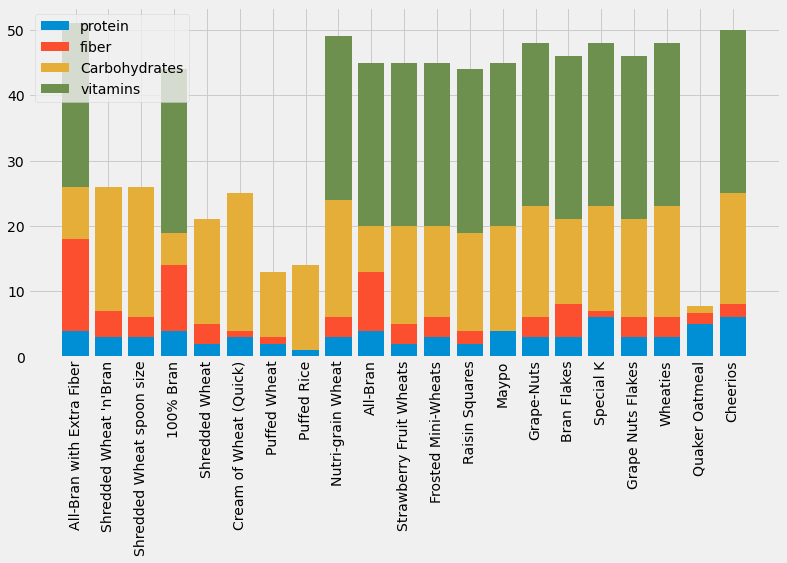

In [18]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.bar(cereal_50plus['name'], cereal_50plus['protein'],label='protein')
ax.bar(cereal_50plus['name'], cereal_50plus['fiber'], bottom=cereal_50plus['protein'],label='fiber')
ax.bar(cereal_50plus['name'], cereal_50plus['Carbohydrates'], bottom=cereal_50plus['protein']+cereal_50plus['fiber'],label='Carbohydrates')
ax.bar(cereal_50plus['name'], cereal_50plus['vitamins'], bottom=cereal_50plus['protein']+cereal_50plus['fiber']+cereal_50plus['Carbohydrates'],label='vitamins')

ax.set_xticklabels(cereal_50plus['name'],rotation=90)
ax.legend()

### conclusion:
It can be seen that the amount of nutritional values does not necessarily affect the ranking of the cereals.
To be continued...

In [19]:
cereal_50minus =df[df['rating']<50]
cereal_50minus 

,name,Manufacturer,type,calories,protein,fat,sodium,fiber,Carbohydrates,sugars,Potassium,vitamins,shelf,weight,cups,rating
74,Wheat Chex,R,C,100,3,1,230,3.0,17.0,3,115,25,1,1.00,0.67,49.787445
56,Quaker Oat Squares,Q,C,100,4,1,135,2.0,14.0,6,110,25,3,1.00,0.50,49.511874
8,Bran Chex,R,C,90,2,1,200,4.0,15.0,6,125,25,1,1.00,0.67,49.120253
21,Crispix,K,C,110,2,0,220,1.0,21.0,3,30,25,3,1.00,1.00,46.895644
71,Total Whole Grain,G,C,100,3,1,200,3.0,16.0,3,110,100,3,1.00,1.00,46.658844
16,Corn Flakes,K,C,100,2,0,290,1.0,21.0,2,35,25,1,1.00,1.00,45.863324
34,Great Grains Pecan,P,C,120,3,3,75,3.0,13.0,4,100,25,3,1.00,0.33,45.811716
41,Life,Q,C,100,4,2,150,2.0,12.0,6,95,25,2,1.00,0.67,45.328074
23,Double Chex,R,C,100,2,0,190,1.0,18.0,5,80,25,3,1.00,0.75,44.330856
61,Rice Chex,R,C,110,1,0,240,0.0,23.0,2,30,25,1,1.00,1.13,41.998933


C:\Users\CORALR~1\AppData\Local\Temp/ipykernel_12012/1776816139.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(cereal_50minus['name'],rotation=90)


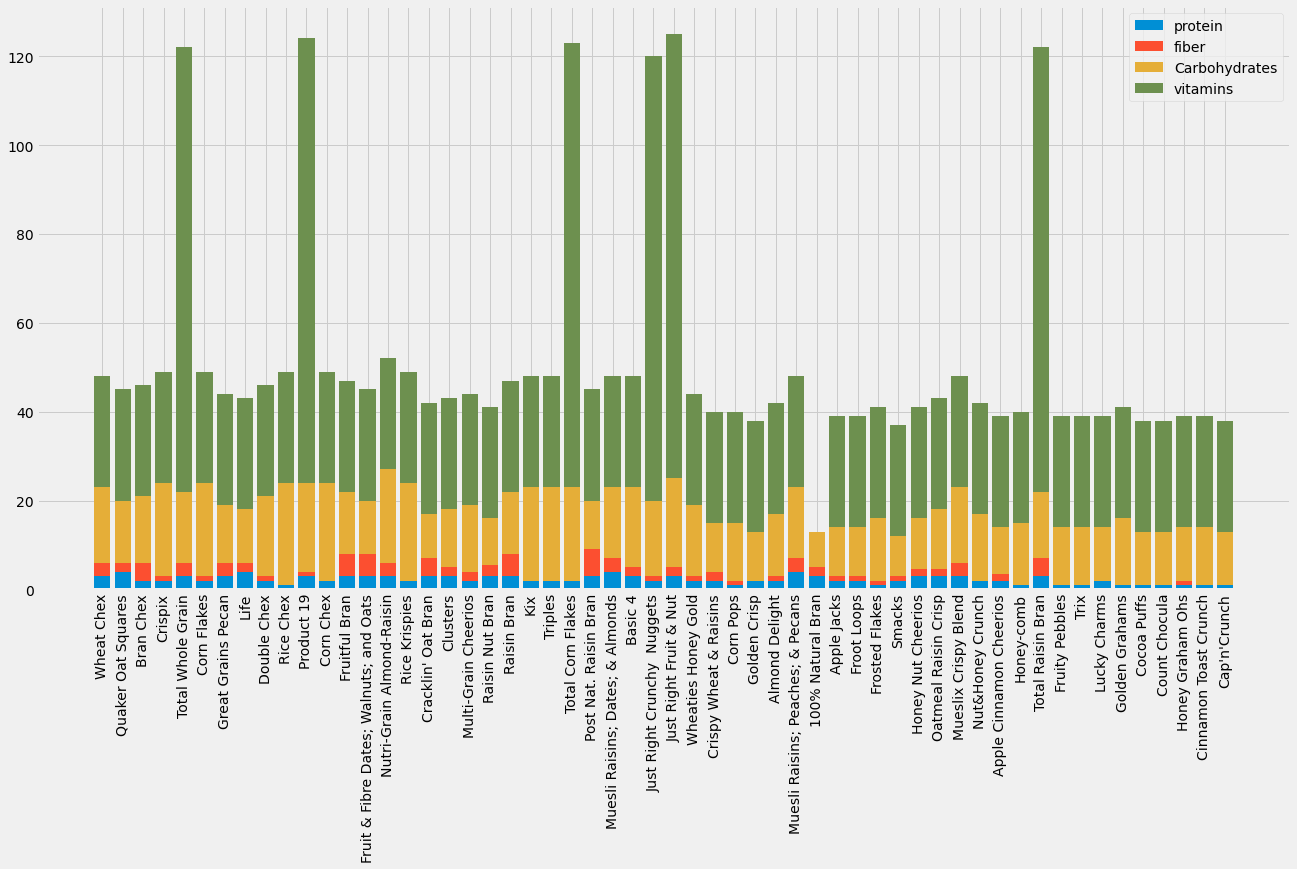

In [20]:
fig, ax = plt.subplots(figsize=(20, 10))
ax.bar(cereal_50minus['name'], cereal_50minus['protein'],label='protein')
ax.bar(cereal_50minus['name'], cereal_50minus['fiber'], bottom=cereal_50minus['protein'],label='fiber')
ax.bar(cereal_50minus['name'], cereal_50minus['Carbohydrates'], bottom=cereal_50minus['protein']+cereal_50minus['fiber'],label='Carbohydrates')
ax.bar(cereal_50minus['name'], cereal_50minus['vitamins'], bottom=cereal_50minus['protein']+cereal_50minus['fiber']+cereal_50minus['Carbohydrates'],label='vitamins')

ax.set_xticklabels(cereal_50minus['name'],rotation=90)
ax.legend()

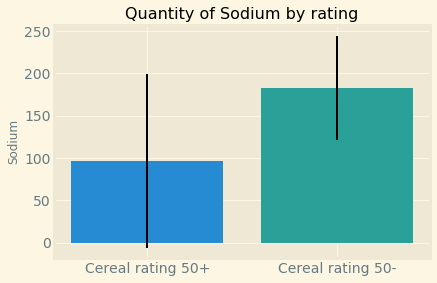

In [33]:
plt.style.use('Solarize_Light2')
fig, ax = plt.subplots()

# Add a bar for the rowing "Height" column mean/std
ax.bar("Cereal rating 50+", cereal_50plus['sodium'].mean(), yerr=cereal_50plus['sodium'].std())


# Add a bar for the gymnastics "Height" column mean/std
ax.bar("Cereal rating 50-", cereal_50minus['sodium'].mean(), yerr=cereal_50minus['sodium'].std())

# Label the y-axis
ax.set_ylabel("Sodium")
ax.set_title("Quantity of Sodium by rating")

plt.show()


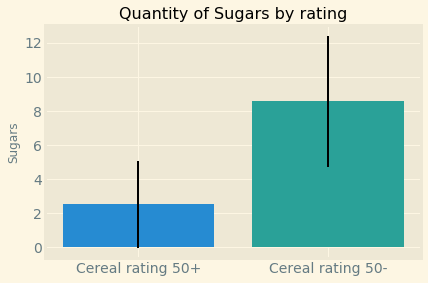

In [34]:

fig, ax = plt.subplots()

# Add a bar for the rowing "Height" column mean/std
ax.bar("Cereal rating 50+", cereal_50plus['sugars'].mean(), yerr=cereal_50plus['sugars'].std())


# Add a bar for the gymnastics "Height" column mean/std
ax.bar("Cereal rating 50-", cereal_50minus['sugars'].mean(), yerr=cereal_50minus['sugars'].std())

# Label the y-axis
ax.set_ylabel("Sugars")
ax.set_title("Quantity of Sugars by rating")


plt.show()

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


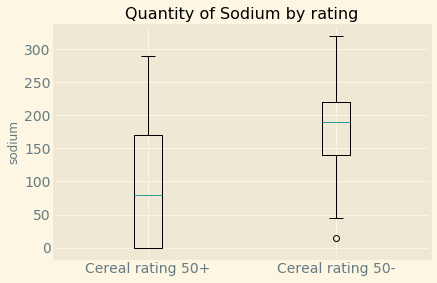

In [35]:
print(plt.style.available)
plt.style.use('_classic_test_patch')
fig, ax = plt.subplots()

# Add a boxplot for the "Height" column in the DataFrames
ax.boxplot([cereal_50plus['sodium'],cereal_50minus['sodium']])

# Add x-axis tick labels:
ax.set_xticklabels(['Cereal rating 50+','Cereal rating 50-'])

# Add a y-axis label
ax.set_ylabel('sodium')
ax.set_title("Quantity of Sodium by rating")



plt.show()

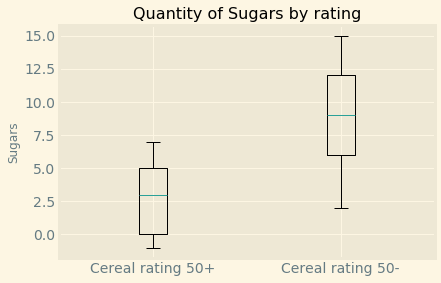

In [36]:
fig, ax = plt.subplots()

# Add a boxplot for the "Height" column in the DataFrames
ax.boxplot([cereal_50plus['sugars'],cereal_50minus['sugars']])

# Add x-axis tick labels:
ax.set_xticklabels(['Cereal rating 50+','Cereal rating 50-'])

# Add a y-axis label
ax.set_ylabel('Sugars')
ax.set_title("Quantity of Sugars by rating")



plt.show()

In [25]:
Manu_50plus =  cereal_50plus['Manufacturer'].unique()
Manu_50plus

array(['K', 'N', 'Q', 'A', 'P', 'G'], dtype=object)

Text(0.5, 1.0, 'Average sugar in cereals by manufacturer for rating of 50 plus')

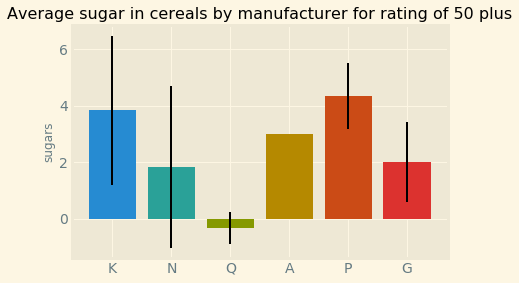

In [39]:
fig, ax = plt.subplots()

# Loop over the different sports branches
for manu in Manu_50plus:
  # Extract the rows only for this sport
  manu_50plus_df = cereal_50plus[cereal_50plus["Manufacturer"]==manu]
  # Add a bar for the "Weight" mean with std y error bar
  ax.bar(manu,manu_50plus_df['sugars'].mean(),yerr=manu_50plus_df['sugars'].std())
ax.set_ylabel("sugars")
ax.set_title("Average sugar in cereals by the manufacturer for rating of 50 plus")





In [27]:
Manu_50minus =cereal_50minus['Manufacturer'].unique()
Manu_50minus

array(['R', 'Q', 'K', 'G', 'P'], dtype=object)

Text(0.5, 1.0, 'Average sugar in cereals by the manufacturer for rating of 50 minus')

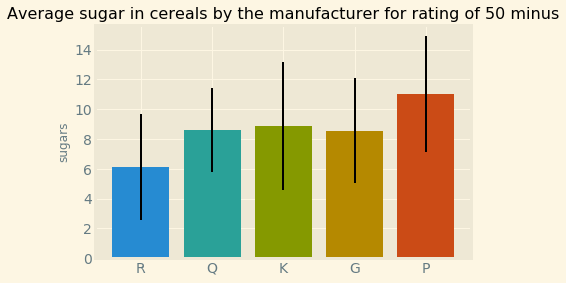

In [46]:
fig, ax = plt.subplots()

# Loop over the different sports branches
for manu in Manu_50minus:
  # Extract the rows only for this sport
  manu_50minus_df = cereal_50minus[cereal_50minus["Manufacturer"]==manu]
  # Add a bar for the "Weight" mean with std y error bar
  ax.bar(manu,manu_50minus_df['sugars'].mean(),yerr=manu_50minus_df['sugars'].std())
ax.set_ylabel("sugars")
ax.set_title("Average sugar in cereals by the manufacturer for rating of 50 minus")


Text(0.5, 1.0, 'Rating by amount of sugar')

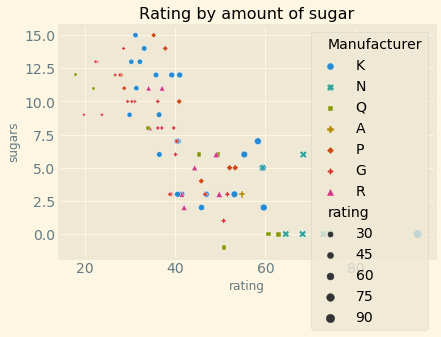

In [58]:
sns.scatterplot(x='rating',y='sugars',data=df,hue='Manufacturer',size='rating',style='Manufacturer').set_title("Rating by amount of sugar")

Text(0.5, 1.0, 'Rating by amount of sodium')

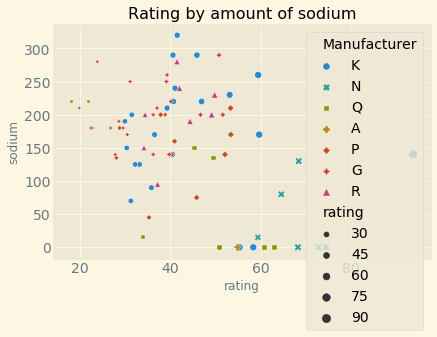

In [59]:
sns.scatterplot(x='rating',y='sodium',data=df,hue='Manufacturer',size='rating',style='Manufacturer').set_title("Rating by amount of sodium")


### conclusion:
The amount of sugar and sodium is related to the ranking of the cereal.

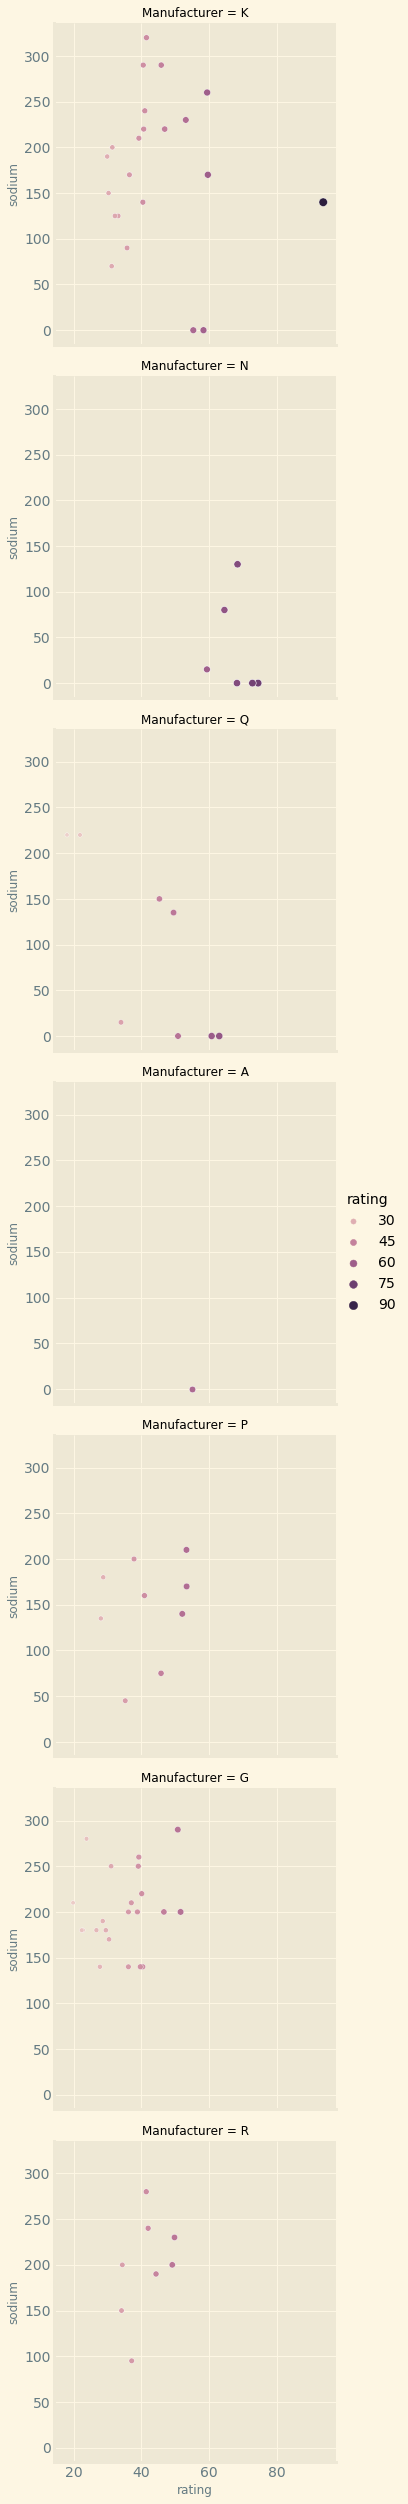

In [56]:
sns.relplot(x="rating", y="sodium", data=df,kind="scatter", row="Manufacturer",size='rating',hue='rating')

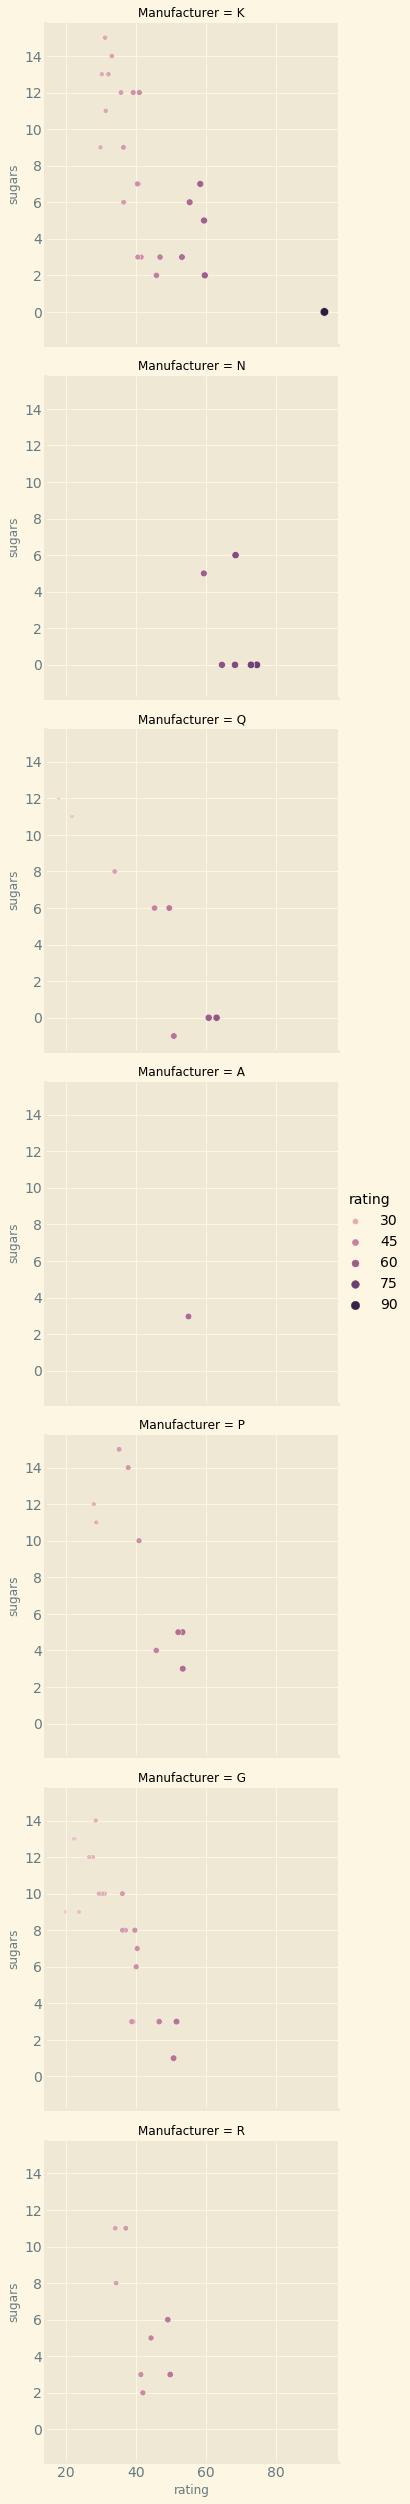

In [55]:
sns.relplot(x="rating", y="sugars", data=df,kind="scatter", row="Manufacturer",size='rating',hue='rating')